In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt

In [2]:
band = rasterio.open('T36UXV_20200406T083559_TCI_10m.jp2', driver='JP2OpenJPEG') #blue

In [3]:
plt.rcParams['figure.figsize'] = [20, 20]

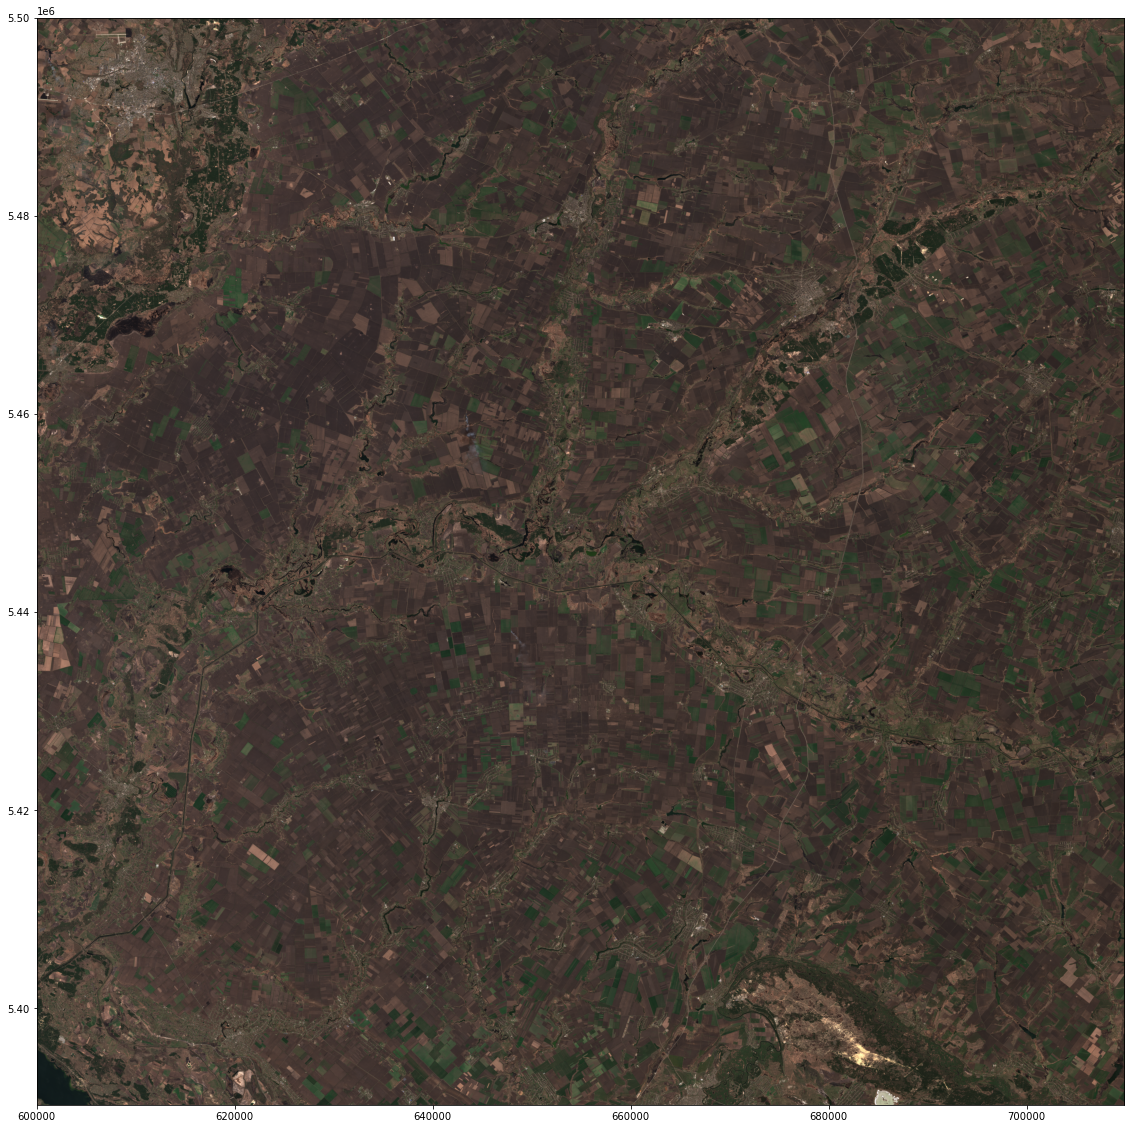

<AxesSubplot:>

In [4]:
plot.show(band)

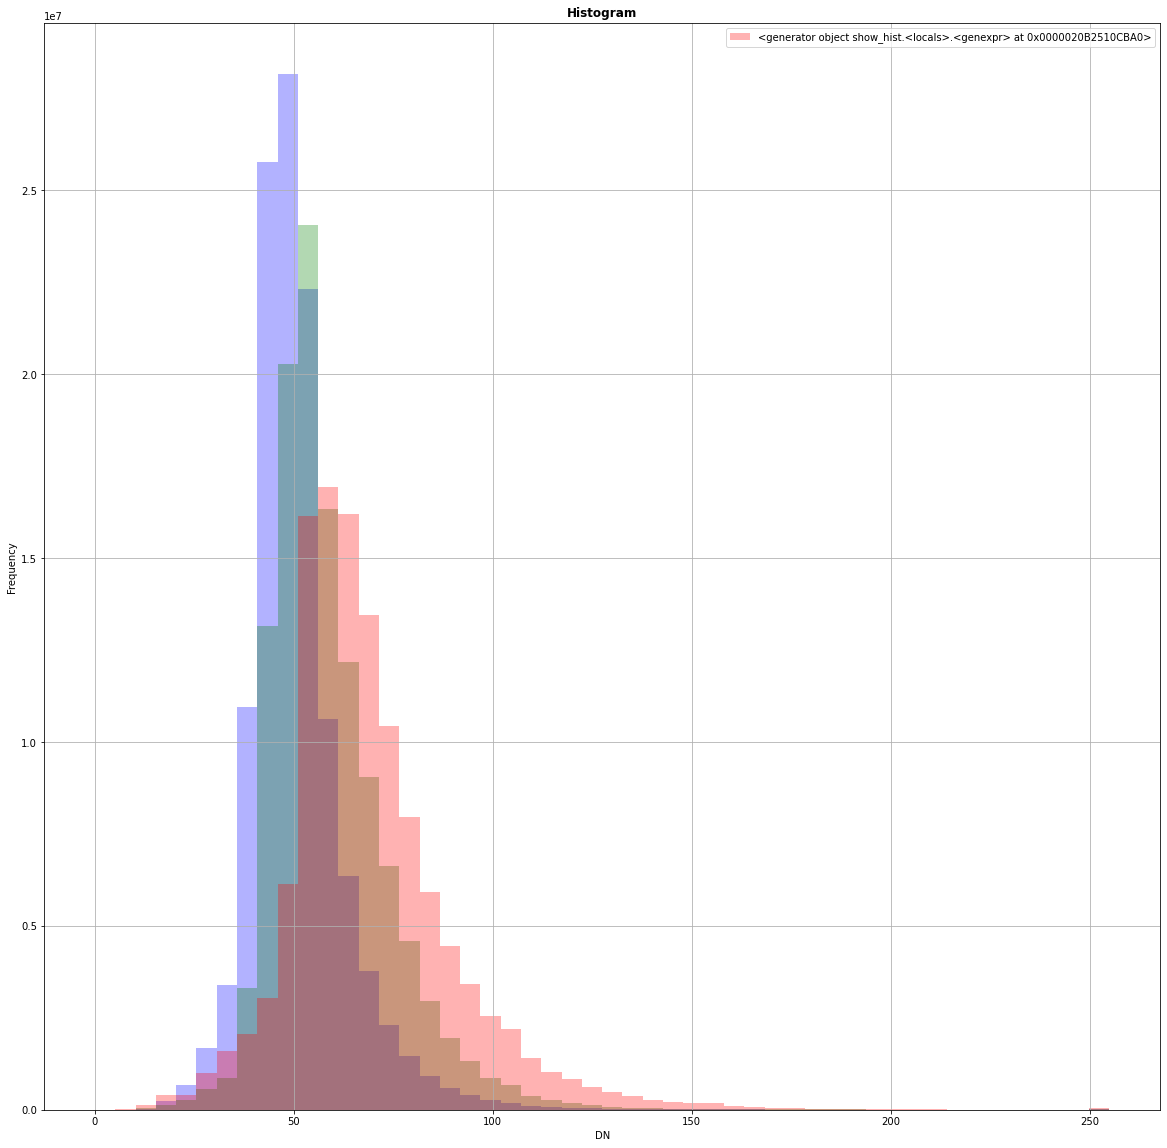

In [5]:
trueColor = rasterio.open('T36UXV_20200406T083559_TCI_10m.jp2')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [6]:
import geopandas as gpd

In [7]:
awash = gpd.read_file('masks/')

In [8]:
awash

id  Data  Code        Descriptio Comments                   Image  \
0    None  None   2.0    branch of tree     None  T36UXV_20190427T083601   
1    None  None   1.0   color+ feathers     None  T36UXV_20190427T083601   
2    None  None   2.0    brahch of tree     None  T36UXV_20190427T083601   
3    None  None   1.0   color+ feathers     None  T36UXV_20190427T083601   
4    None  None   1.0   color+ feathers     None  T36UXV_20190427T083601   
..    ...   ...   ...               ...      ...                     ...   
931  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
932  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
933  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
934  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   
935  None  None   1.0  color+ structure     None  T36UXV_20190427T083601   

                                              geometry  
0    POLYGON ((35.62916 49.60293, 35.63015 49.60163...  
1    POLYGON ((35.65070 49.60254, 35.65248 49.60301...  
2    POLYGON ((35.63023 49.60826, 35.62960 49.60920...  
3    POLYGON ((35.62033 49.60905, 35.62064 49.60968...  
4    POLYGON ((35.60455 49.61078, 35.60597 49.61228...  
..                                                 ...  
931  POLYGON ((35.60033 49.04547, 35.60011 49.04496...  
932  POLYGON ((35.59042 49.04165, 35.59127 49.04155...  
933  POLYGON ((35.60754 49.05593, 35.60796 49.05600...  
934  POLYGON ((35.52378 48.76951, 35.52332 48.76918...  
935  POLYGON ((35.52144 48.77101, 35.52159 48.77118...  

[936 rows x 7 columns]

In [9]:
awash.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          0 non-null      object  
 1   Data        0 non-null      object  
 2   Code        340 non-null    float64 
 3   Descriptio  335 non-null    object  
 4   Comments    17 non-null     object  
 5   Image       325 non-null    object  
 6   geometry    935 non-null    geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 51.3+ KB


<AxesSubplot:>

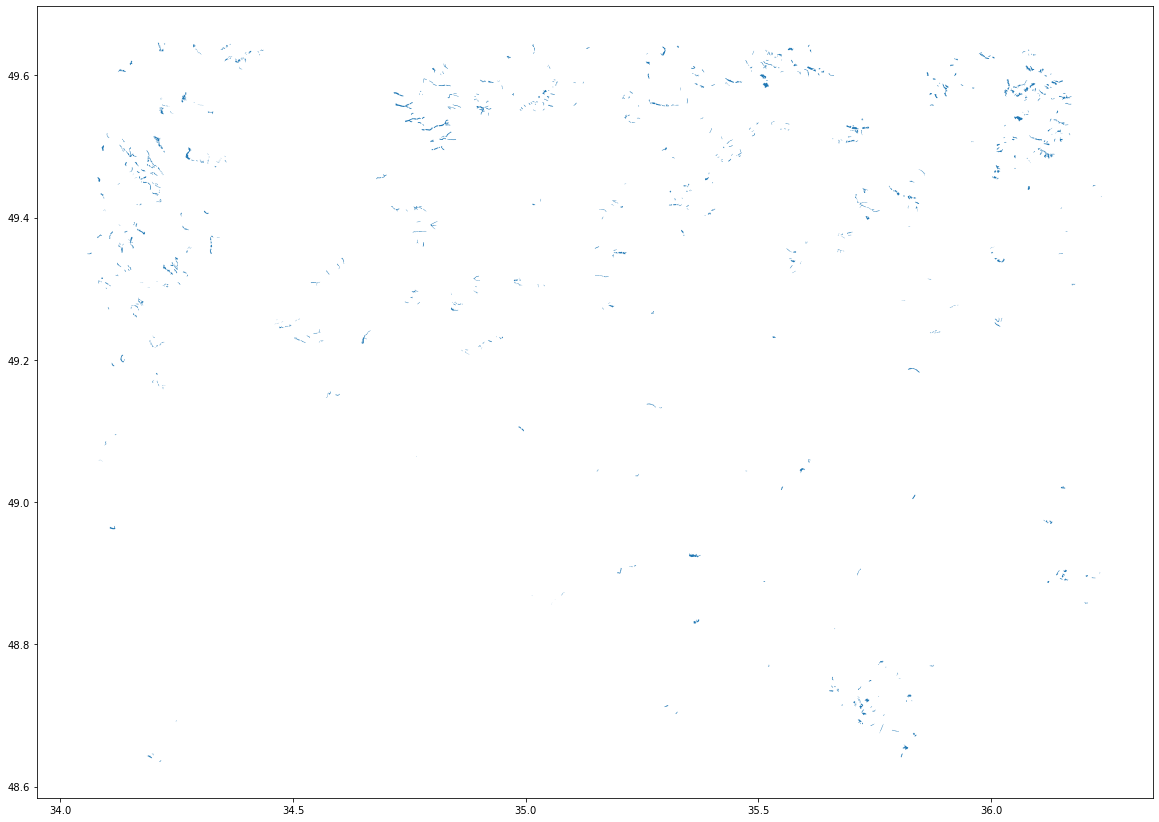

In [10]:
awash.plot()

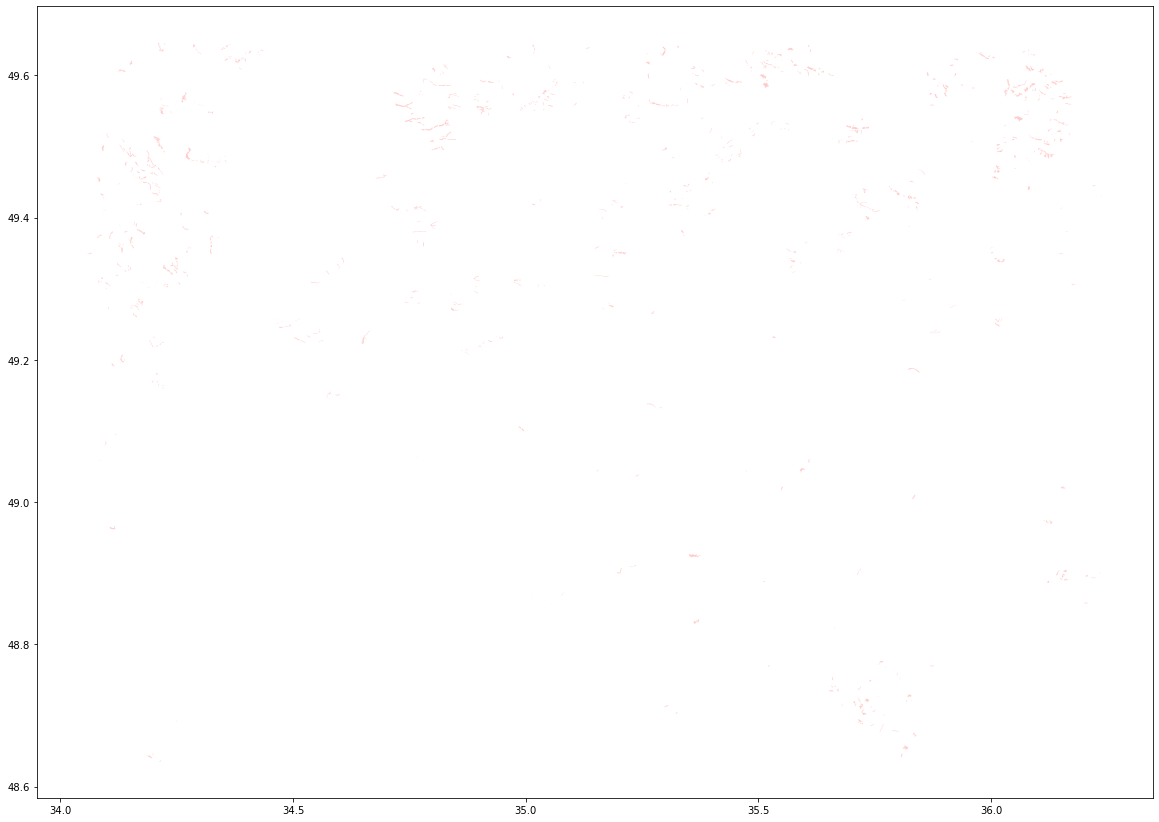

In [11]:
ax = awash.plot(alpha=0.2, color='red')
# img.mean(dim="time").plot(ax=ax,zorder=-1)

In [12]:
band.crs

CRS.from_epsg(32636)

In [13]:
awash.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
features =awash.geometry

In [16]:
from rasterio import mask

In [17]:
with rasterio.open('T36UXV_20200406T083559_TCI_10m.jp2') as src:

    out_image, out_transform = mask.mask(src, [awash.geometry], invert=True)

C:\Users\user\anaconda3\envs\Quantom\lib\site-packages\rasterio\mask.py:88: UserWarning: shapes are outside bounds of raster. Are they in different coordinate reference systems?
  warnings.warn('shapes are outside bounds of raster. '


In [19]:
from rasterio.plot import show

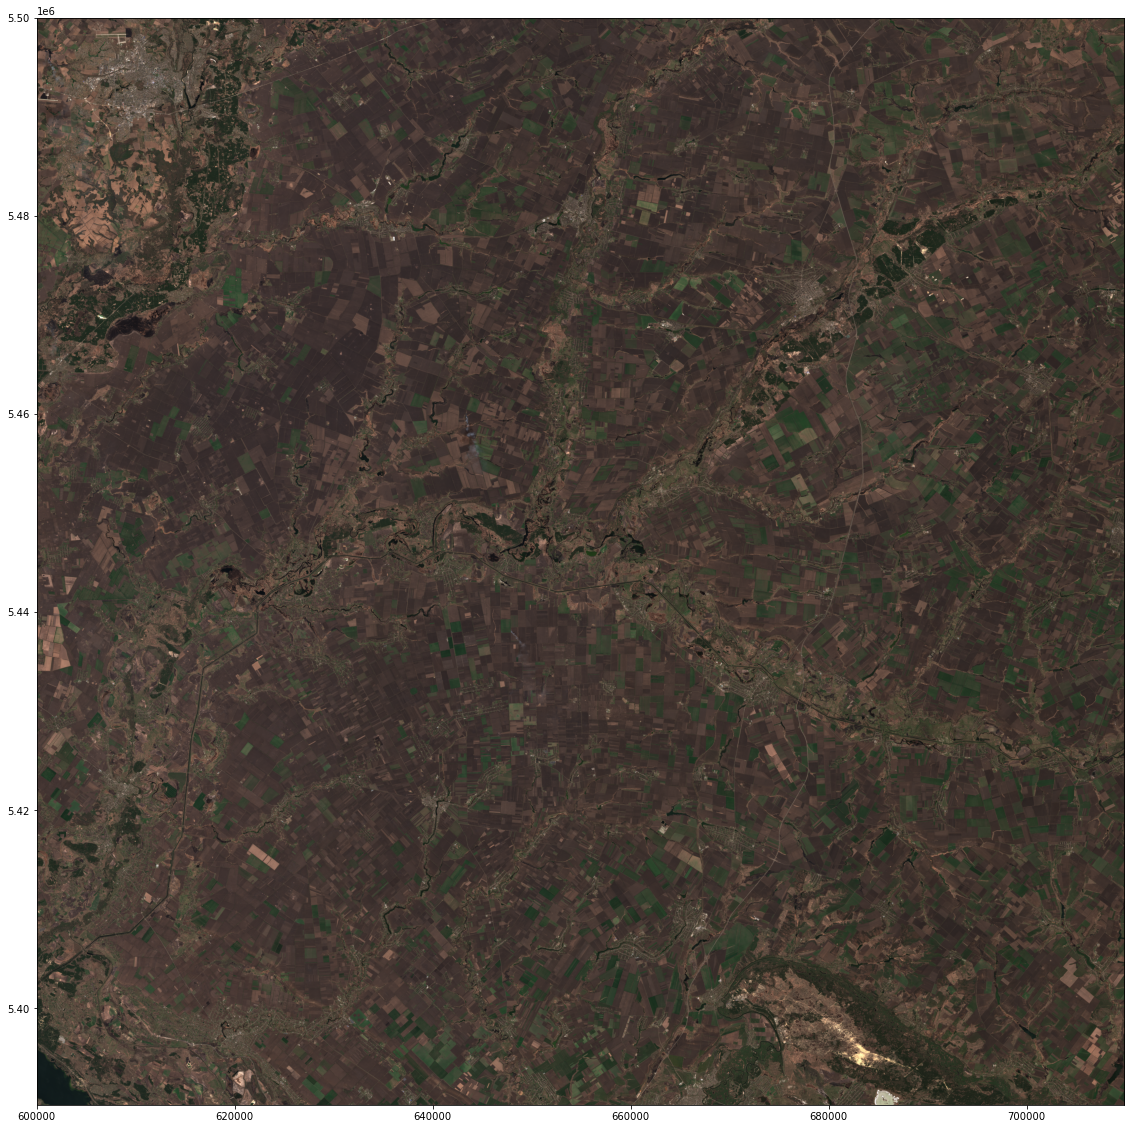

<AxesSubplot:>

In [20]:
fig, ax = plt.subplots(figsize=(25, 20))
show(out_image, transform=out_transform)